In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [65]:
data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [66]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [67]:
data = data.drop(columns= ['Department','Education','EducationField','Over18','StockOptionLevel','NumCompaniesWorked','JobInvolvement', 'DailyRate','EmployeeCount','DistanceFromHome','PercentSalaryHike'])

In [68]:
data.head(5)

,Age,Attrition,BusinessTravel,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobLevel,JobRole,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1,2,Female,94,2,Sales Executive,4,...,3,1,80,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,2,3,Male,61,2,Research Scientist,2,...,4,4,80,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,4,4,Male,92,1,Laboratory Technician,3,...,3,2,80,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,5,4,Female,56,1,Research Scientist,3,...,3,3,80,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,7,1,Male,40,1,Laboratory Technician,2,...,3,4,80,6,3,3,2,2,2,2


In [69]:
data.tail(5)

,Age,Attrition,BusinessTravel,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobLevel,JobRole,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,2061,3,Male,41,2,Laboratory Technician,4,...,3,3,80,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,2062,4,Male,42,3,Healthcare Representative,1,...,3,1,80,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,2064,2,Male,87,2,Manufacturing Director,2,...,4,2,80,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,2065,4,Male,63,2,Sales Executive,2,...,3,4,80,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,2068,2,Male,82,2,Laboratory Technician,3,...,3,1,80,6,3,4,4,3,1,2


In [70]:
data.shape

(1470, 24)

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   EmployeeNumber            1470 non-null   int64 
 4   EnvironmentSatisfaction   1470 non-null   int64 
 5   Gender                    1470 non-null   object
 6   HourlyRate                1470 non-null   int64 
 7   JobLevel                  1470 non-null   int64 
 8   JobRole                   1470 non-null   object
 9   JobSatisfaction           1470 non-null   int64 
 10  MaritalStatus             1470 non-null   object
 11  MonthlyIncome             1470 non-null   int64 
 12  MonthlyRate               1470 non-null   int64 
 13  OverTime                  1470 non-null   object
 14  PerformanceRating       

In [72]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
OverTime                    0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [73]:
data.isna().sum().sum()

np.int64(0)

In [74]:
data.duplicated().sum()

np.int64(0)

In [75]:
data['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [76]:
data.describe()

,Age,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,1024.865306,2.721769,65.891156,2.063946,2.728571,6502.931293,14313.103401,3.153741,2.712245,80.0,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,602.024335,1.093082,20.329428,1.106940,1.102846,4707.956783,7117.786044,0.360824,1.081209,0.0,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1009.000000,2094.000000,3.000000,1.000000,80.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,491.250000,2.000000,48.000000,1.000000,2.000000,2911.000000,8047.000000,3.000000,2.000000,80.0,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,1020.500000,3.000000,66.000000,2.000000,3.000000,4919.000000,14235.500000,3.000000,3.000000,80.0,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1555.750000,4.000000,83.750000,3.000000,4.000000,8379.000000,20461.500000,3.000000,4.000000,80.0,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,2068.000000,4.000000,100.000000,5.000000,4.000000,19999.000000,26999.000000,4.000000,4.000000,80.0,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [77]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'OverTime', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

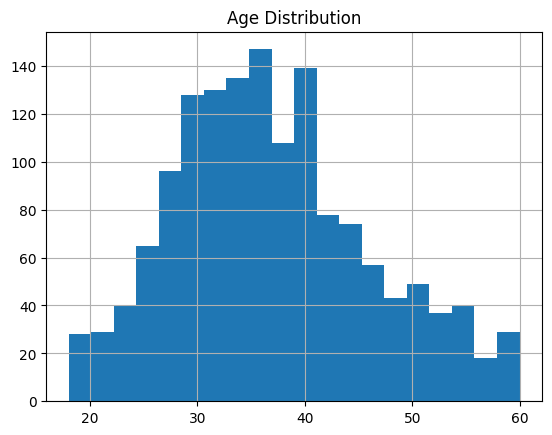

In [78]:
# Histograms for numerical columns
data['Age'].hist(bins=20)
plt.title('Age Distribution')
plt.show()

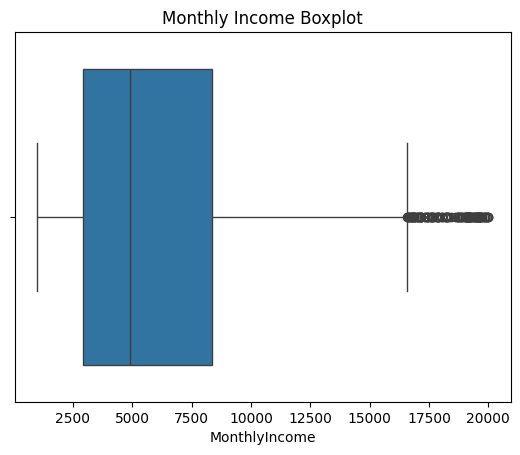

In [79]:
# Boxplot for outliers
sns.boxplot(x=data['MonthlyIncome'])
plt.title('Monthly Income Boxplot')
plt.show()

In [80]:
# Frequency of categories
print(data['Gender'].value_counts())

Gender
Male      882
Female    588
Name: count, dtype: int64


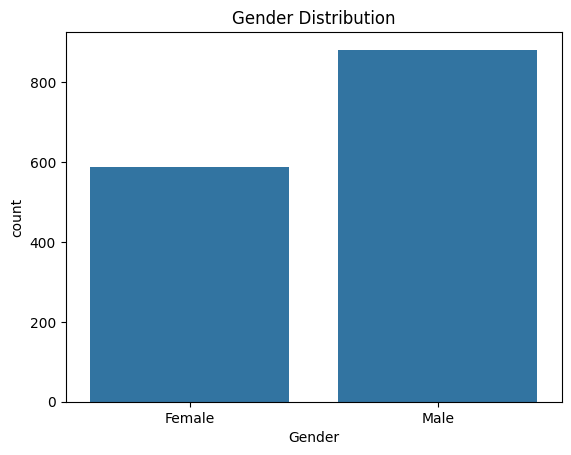

In [81]:
# Bar plot for categorical columns
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')
plt.show()

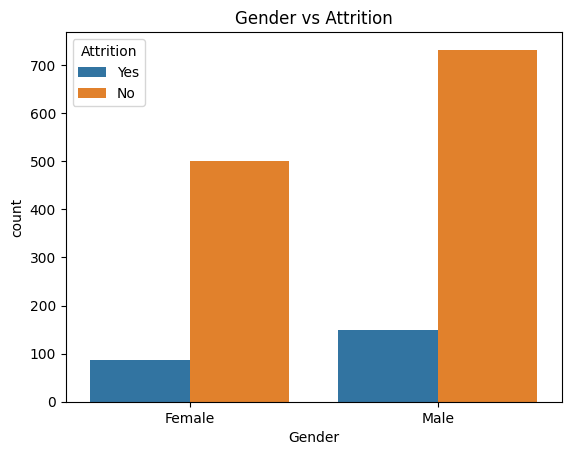

In [82]:
# Grouped bar plot (e.g., Gender vs Attrition)
sns.countplot(x='Gender', hue='Attrition', data=data)
plt.title('Gender vs Attrition')
plt.show()

In [83]:
# Target variable distribution
print(data['Attrition'].value_counts())


Attrition
No     1233
Yes     237
Name: count, dtype: int64


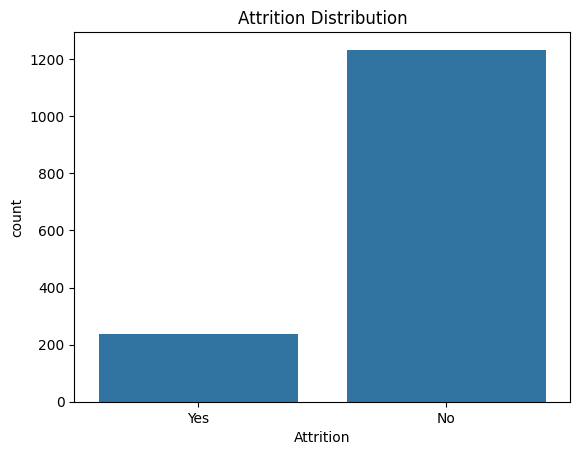

In [84]:
# Bar plot for Attrition
sns.countplot(x='Attrition', data=data)
plt.title('Attrition Distribution')
plt.show()

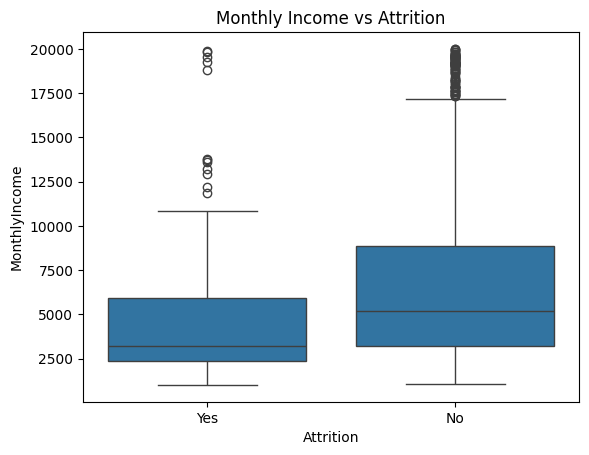

In [85]:
# Boxplot: MonthlyIncome vs Attrition
sns.boxplot(x='Attrition', y='MonthlyIncome', data=data)
plt.title('Monthly Income vs Attrition')
plt.show()

In [86]:
# Handle outliers
def handle_outliers(column):
    lower = column.quantile(0.05)
    upper = column.quantile(0.95)
    return np.where(column < lower, lower, np.where(column > upper, upper, column))

data['Age'] = handle_outliers(data['Age'])
data['MonthlyIncome'] = handle_outliers(data['MonthlyIncome'])

In [87]:
data['MonthlyIncome'] = np.log1p(data['MonthlyIncome'])

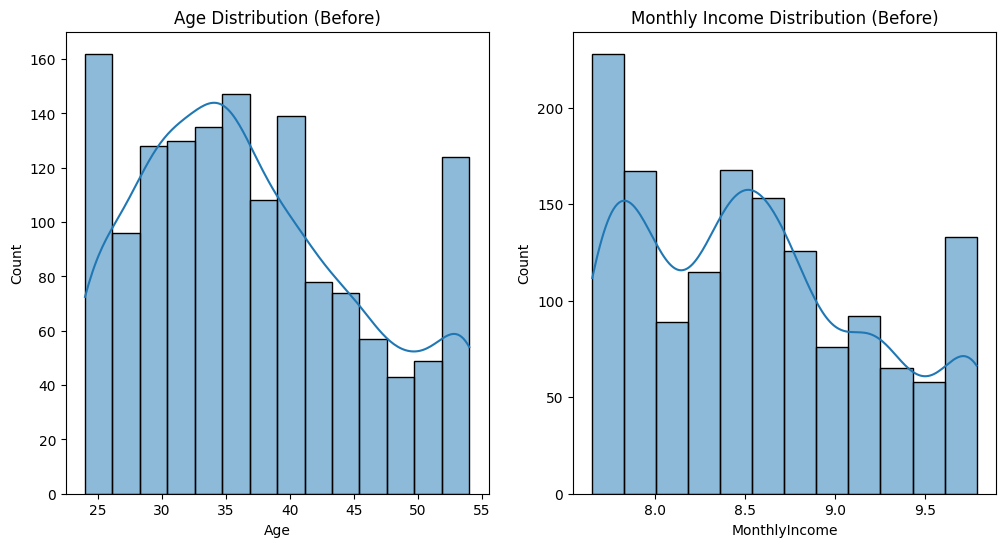

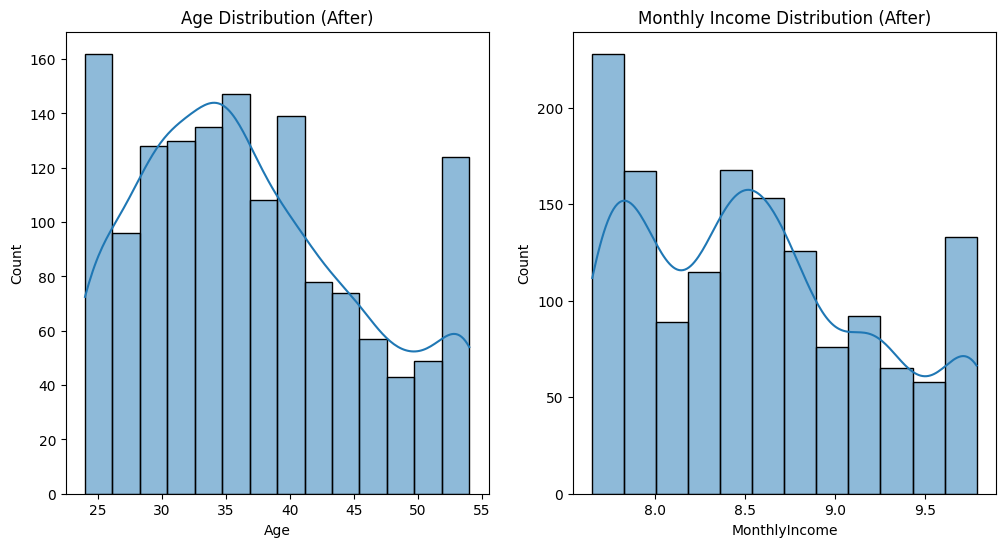

In [88]:
import matplotlib.pyplot as plt

# Before outlier handling
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution (Before)')

plt.subplot(1, 2, 2)
sns.histplot(data['MonthlyIncome'], kde=True)
plt.title('Monthly Income Distribution (Before)')
plt.show()

# After outlier handling
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution (After)')

plt.subplot(1, 2, 2)
sns.histplot(data['MonthlyIncome'], kde=True)
plt.title('Monthly Income Distribution (After)')
plt.show()

In [89]:
# Example: Create a new feature
data['PromotionRate'] = data['YearsSinceLastPromotion'] / data['YearsAtCompany']

# One-hot encoding for categorical columns
df = pd.get_dummies(data, columns=['Gender', 'MaritalStatus', 'JobRole'], drop_first=True)

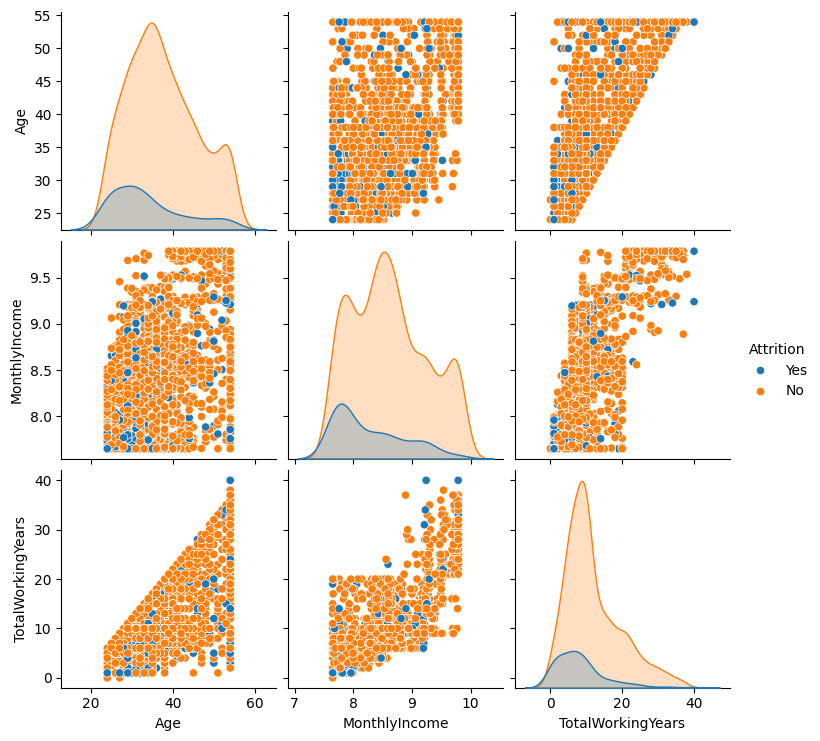

In [92]:
# Pair plot for numerical features
sns.pairplot(data[['Age', 'MonthlyIncome', 'TotalWorkingYears', 'Attrition']], hue='Attrition')
plt.show()


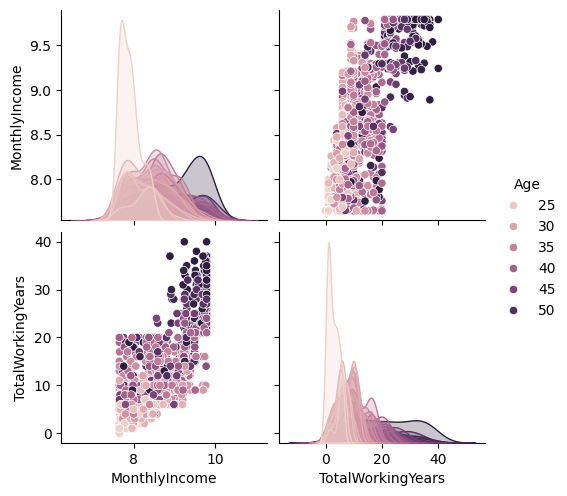

In [94]:
sns.pairplot(data[['Age', 'MonthlyIncome', 'TotalWorkingYears', 'Attrition']], hue='Age')


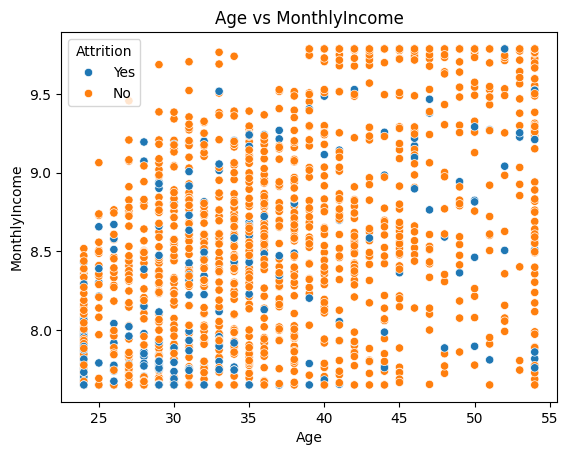

In [96]:
# Scatter plot: Age vs MonthlyIncome
sns.scatterplot(x='Age', y='MonthlyIncome', hue='Attrition', data=df)
plt.title('Age vs MonthlyIncome')
plt.show()


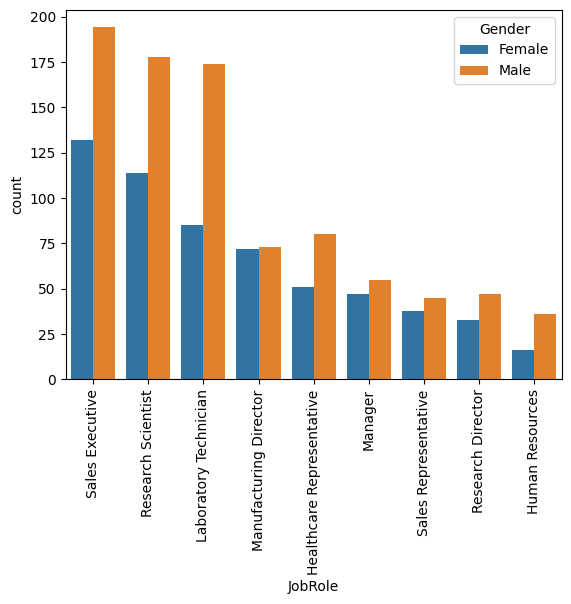

In [97]:
sns.countplot(x='JobRole', hue='Gender', data=data)
plt.xticks(rotation=90)
plt.show()

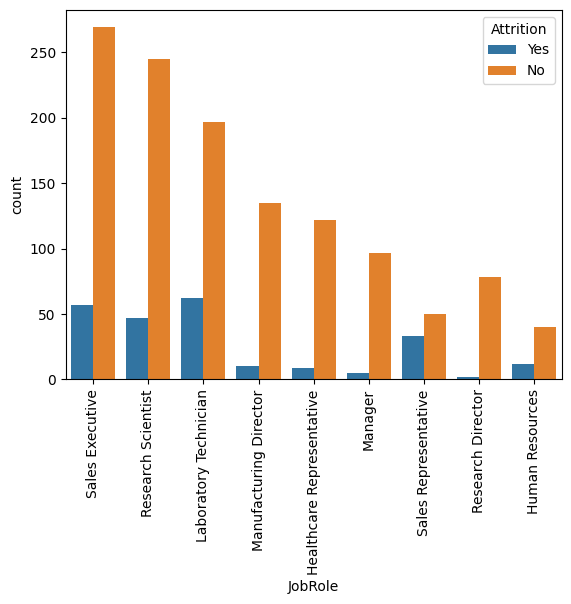

In [98]:
sns.countplot(x='JobRole', hue='Attrition', data=data)
plt.xticks(rotation=90)
plt.show()

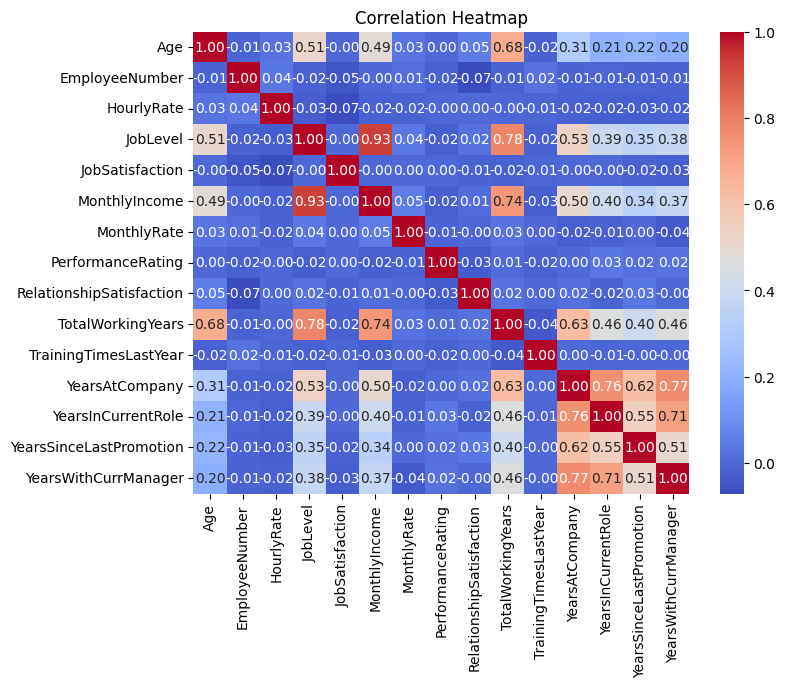

In [99]:
# Selecting the correct numerical columns for correlation
selected_columns = ['Age','EmployeeNumber', 'HourlyRate', 'JobLevel', 'JobSatisfaction','MonthlyIncome',
       'MonthlyRate','PerformanceRating',
       'RelationshipSatisfaction','TotalWorkingYears',
       'TrainingTimesLastYear','YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']
corr_matrix = data[selected_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

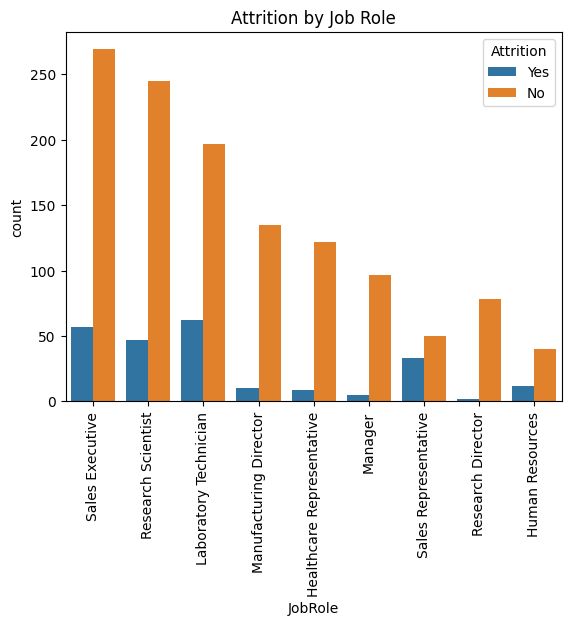

In [100]:
# Attrition by JobRole
sns.countplot(x='JobRole', hue='Attrition', data=data)
plt.xticks(rotation=90)
plt.title('Attrition by Job Role')
plt.show()

# Preprocess the Data

Encode Categorical Variables: Convert categorical features (e.g., Gender, MaritalStatus, OverTime) into numerical format using one-hot encoding or label encoding.

In [101]:
# Encode categorical variables
data = pd.get_dummies(data, columns=['Gender', 'BusinessTravel', 'JobRole', 'MaritalStatus', 'OverTime'], drop_first=True)

In [102]:
data.columns.value_counts().sum()

np.int64(34)

In [103]:
#Scale Numerical Features: Normalize or standardize numerical features
#(e.g., Age, MonthlyIncome, TotalWorkingYears).
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['Age', 'MonthlyIncome', 'TotalWorkingYears']] = scaler.fit_transform(data[['Age', 'MonthlyIncome', 'TotalWorkingYears']])

In [104]:
#Split Data: Split the dataset into training and testing sets.

from sklearn.model_selection import train_test_split

X = data.drop('Attrition', axis=1)
y = data['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
X_train.isnull().sum()
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Ensure y_train aligns with X_train

In [106]:
X_test.isna().sum()
X_test = X_test.dropna()


In [107]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


C:\Users\Star\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [108]:
#Ramdom Forest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [114]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1140, 33)
X_test shape: (286, 33)
y_train shape: (1140,)
y_test shape: (294,)


In [120]:
from sklearn.metrics import classification_report, confusion_matrix

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

          No       0.88      0.99      0.93       255
         Yes       0.50      0.08      0.13        39

    accuracy                           0.87       294
   macro avg       0.69      0.53      0.53       294
weighted avg       0.83      0.87      0.82       294

Confusion Matrix:
[[252   3]
 [ 36   3]]


# Explain Model Predictions


SHAP (SHapley Additive exPlanations)


# Actionable Insights


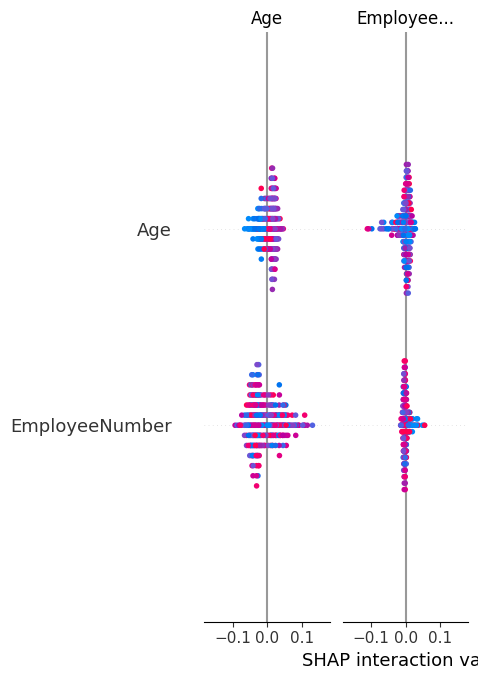

In [125]:
import shap

# Explain Random Forest model
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)

In [172]:
import joblib

# Save the model
joblib.dump(model, 'employee_attrition_model.pkl')

['employee_attrition_model.pkl']